<h2 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    HyperParameter Tuning for KNN model
</h2>

![alt text](<Screenshot 2024-08-08 155524.png>)

* How to find the Best Parameters set for the KNN Model.

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    KNN
</h6>

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Overview
</h6>


**K-Nearest Neighbors (KNN)** is a simple yet powerful algorithm used primarily for classification but can also be used for regression tasks. It’s a **supervised learning** algorithm, meaning it relies on labeled data to learn from.



<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    How KNN Works
</h6>


1. **Data Storage:** KNN doesn’t have a training phase in the traditional sense. Instead, it stores the entire dataset during the training phase.
2. **Distance Calculation:** When a new data point needs to be classified or predicted, KNN calculates the distance between this new point and all points in the training dataset. The most common distance metric is **Euclidean distance**, but other metrics like Manhattan or Minkowski distances can also be used.
3. **Nearest Neighbors:** The algorithm identifies the **k** nearest neighbors (the data points closest to the new point).
4. **Voting for Classification:** In classification tasks, the new point is assigned the class label that is most common among its k nearest neighbors.
5. **Averaging for Regression:** In regression tasks, the algorithm averages the values of the k nearest neighbors to predict the value for the new point.

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Choosing the Optimal K for KNN
</h6>


Finding the best value for **k** is crucial for the performance of KNN. If **k** is too small, the algorithm might be too sensitive to noise in the data. If **k** is too large, the algorithm might overlook important patterns.

- **Elbow Method:** You can plot the error rate (or accuracy) against different values of **k** and look for the 'elbow' point where the error rate starts to level off. The corresponding **k** value is often considered optimal.
  
- **Cross-Validation:** You can use techniques like **k-fold cross-validation** to evaluate how the model performs with different **k** values. This involves splitting the dataset into multiple folds, training the model on some folds, and testing it on the remaining folds. The **k** value that gives the best average performance is selected.


<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    GridSearchCV and RandomizedSearchCV
</h6>

These two methods are used to automate the process of finding the optimal **k**:

- **GridSearchCV:** This method exhaustively searches over a specified parameter grid (e.g., different **k** values). It evaluates each combination of parameters using cross-validation and selects the best combination based on a performance metric.

- **RandomizedSearchCV:** Instead of searching every possible combination, this method randomly samples a specified number of parameter combinations from a grid. It’s faster than GridSearchCV and can be more efficient when dealing with a large number of parameters or a large dataset.


<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Apply the four Tuning methods
</h6>

1- Elbow method.\
2- cross-validation.\
3- GridsearchCV.\
4- RandomizedSearchCV.

In [23]:
# import the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [24]:
# read the dataset 
df = pd.read_csv(r'D:\Summer 2024\ML Projects\KNN Hyperparameter Tuning and Validation\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# look at the data problems (no missing values)
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
# datatypes (all are numerical)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
# look at the distribution of the target variable
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [28]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Elbow Method
</h6>

- The Elbow Method is used to find the optimal number of neighbors (k) for KNN.

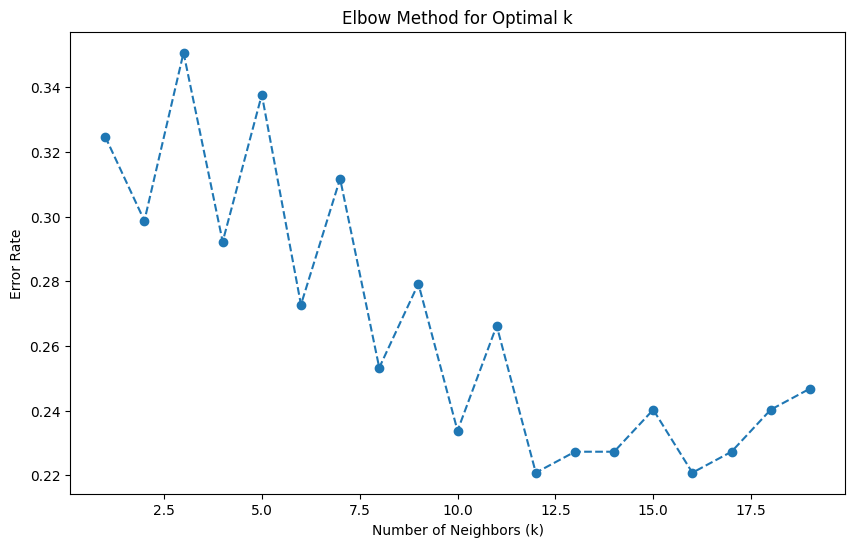

In [30]:
# Apply the Elbow method
error_rates = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.show()

- In this Elbow Method plot, the error rate decreases steadily as k increases from 1 to around 12, after which it begins to stabilize and slightly increase. The optimal k value seems to be around k = 11 or 12, where the error rate is at its lowest before it starts to rise again.

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Cross-Validation
</h6>

- You can use techniques like **k-fold cross-validation** to evaluate how the model performs with different **k** values. This involves splitting the dataset into multiple folds, training the model on some folds, and testing it on the remaining folds. The **k** value that gives the best average performance is selected.

In [31]:
# Perform cross-validation
k_values = range(1, 20)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal k using cross-validation is: {optimal_k}")

The optimal k using cross-validation is: 14


- cross-validation often provides a more accurate estimate of the optimal k, especially if it leads to a higher average accuracy or lower error rate across different data splits. Given this, k = 14 would be the better choice.

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    GridsearchCV
</h6>

- GridSearchCV will exhaustively search over the specified parameter values to find the optimal k.

In [32]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Output the best parameter and score
print(f"Best k using GridSearchCV: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best k using GridSearchCV: 14
Best cross-validation accuracy: 0.7578558696205755


- Since both GridSearchCV and cross-validation agree on k = 14 as the optimal value, this strongly suggests that k = 14 is the best choice for your KNN model. These methods are more robust than the Elbow Method, as they rigorously test the model's performance across different folds of the data, leading to a more reliable selection of k.

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    RandomizedSearchCV
</h6>

- RandomizedSearchCV randomly samples the parameter grid to find the optimal k.

In [33]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=5, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

# Output the best parameter and score
print(f"Best k using RandomizedSearchCV: {random_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {random_search.best_score_}")

Best k using RandomizedSearchCV: 12
Best cross-validation accuracy: 0.7526355996944233


- Given that GridSearchCV thoroughly evaluates every possible value in a specified range and aligns with cross-validation, k = 14 may be more reliable. However, k = 12 from RandomizedSearchCV is also a valid choice, especially if you value efficiency or want to balance error rate and computational cost.

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Validation Curve
</h6>

- helps in assessing how the performance of a model changes with different hyperparameters, in this case, the number of neighbors for k-NN. By plotting the training and test accuracies, you can identify the optimal number of neighbors that balances between overfitting and underfitting.

In [34]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

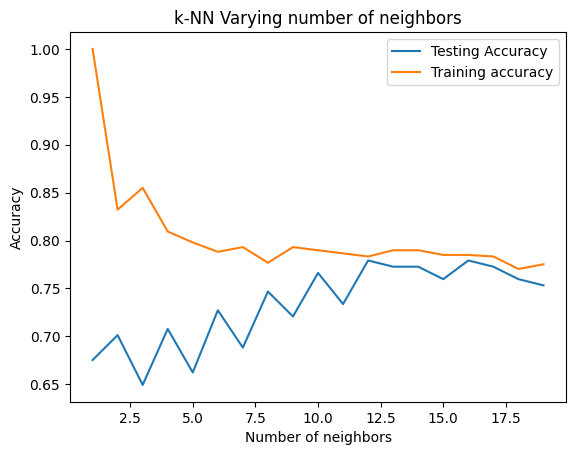

In [35]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Conclusion
</h6>

**Summary of k-NN Hyperparameter Tuning Results:**

- **Elbow Method** and **RandomizedSearchCV** suggest **k = 12**.
- **Cross-Validation**, **GridSearchCV**, and the **Validation Curve** suggest **k = 14**.

**Conclusion**: While k = 12 may offer efficiency and simplicity, k = 14 generally provides better model performance and generalization. Testing both values on a validation set is recommended to finalize the optimal k.

In [36]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate k-NN models
def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Test k = 12 and k = 14
accuracy_k12 = evaluate_knn(12)
accuracy_k14 = evaluate_knn(14)

print(f'Accuracy for k = 12: {accuracy_k12:.2f}')
print(f'Accuracy for k = 14: {accuracy_k14:.2f}')

Accuracy for k = 12: 0.78
Accuracy for k = 14: 0.77


### Interpretation:
- **k = 12** has a slightly higher accuracy (0.78) compared to **k = 14** (0.77) on the validation set.
- Both values are close in performance, but k = 12 marginally outperforms k = 14 based on these results.

### Recommendation:
- Since k = 12 has a marginally higher accuracy and similar performance to k = 14, it might be preferable for its simplicity and potentially reduced computational cost. However, the difference is small, so either choice would be reasonable, and you may consider other factors such as model complexity or computational efficiency in your final decision.